In [1]:
'''Importación de la librería pandas para la manipulación y tratamiento de los datos'''
import pandas as pd
'''Importamos la libreria sklearn  la cual contiene varias herramientas para el aprendizaje automático y modelado estadístico'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
'''Seguidamente, mediante la librería pandas leemos el dataset'''
df_DatosDiabetes = pd.read_csv("Dataset of Diabetes.csv")
df_DatosDiabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [3]:
'''Seguidamente agrupamos los diferentes datos de las columnas que se deben realizar el mapeo.
    Esto se lo realiza para saber si todos los registros de la columna seleccionada tienen el mismo tipo de dato.'''
df_DatosDiabetes.groupby("CLASS").size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

In [4]:
df_DatosDiabetes.groupby("Gender").size()

Gender
F    434
M    565
f      1
dtype: int64

Limpieza

In [5]:
'''Realizamos el mapeo de los registros de las columnas anteriormente especificadas con el tipo de dato correspondiente.
    Por lo que, hacemos uso de la función map.'''
dataGender = {'M': 'M', 'F': 'F', 'f': 'F'}
df_DatosDiabetes['Gender'] = df_DatosDiabetes['Gender'].map(dataGender)
dataClass = {'N ':'N','N': 'N', 'Y':'Y', 'Y ': 'Y', 'P': 'P'}
df_DatosDiabetes['CLASS'] = df_DatosDiabetes['CLASS'].map(dataClass)
'''Imprimimos el DataFrame para ver los cambios realizados'''
df_DatosDiabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [6]:
'''Comprobamos que los cambios se hayan realizado correctamente. Por lo que nuevamente hacemos uso de la función 
    groupby y verficiamos los tipos de datos de los registros de la columna seleccionada'''
df_DatosDiabetes.groupby("CLASS").size()

CLASS
N    103
P     53
Y    844
dtype: int64

In [7]:
df_DatosDiabetes.groupby("Gender").size()

Gender
F    435
M    565
dtype: int64

In [8]:
'''Una vez verificados que los cambios se hayan realizado correctamente, pasamos a la transformación de los tipos de datos
    a tipo numérico, ya que dicho tipo de dato numérico es mejor al momento de procesar'''
dataGender = {'M': 0, 'F': 1}
df_DatosDiabetes['Gender'] = df_DatosDiabetes['Gender'].map(dataGender)
dataClass = {'N': 0,'Y': 1, 'P': 2}
df_DatosDiabetes['CLASS'] = df_DatosDiabetes['CLASS'].map(dataClass).fillna(0.0).astype(int)
'''Imprimimos el DataFrame para verificar los datos'''
df_DatosDiabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [9]:
'''Una vez que se sealizó la limpieza y transformación del dataset. Pasamos a definir las caracteristicas necesarias
    para nuestro modelo. Por lo que, definimos nuestras variables X & Y con sus respectivas columnas del dataFrame'''
feature_cols = [ 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL','VLDL', 'BMI' ]
X = df_DatosDiabetes[feature_cols]
y = df_DatosDiabetes['CLASS'] 

In [10]:
'''Definimos las variables para entrenar posteriormente nuestro modelo. Por lo que, dividimos 
    el conjunto de datos en proporción de conjunto de entrenamiento y prueba 70% y 30% '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
'''Definimos un objeto de tipo Decision Tree'''

clf = DecisionTreeClassifier()
'''Entrenamos el modelo Decision Tree con las variables de entrenamiento anteriormente definidas '''
clf = clf.fit(X_train,y_train)
'''Definimos la predeccion a (y) para la prueba de nuestro modelo. Por lo que, le pasamos la variable definida X_test
    anteriormente'''
y_pred = clf.predict(X_test)
'''Imprimimos la variable y_pred para ver los valores que contiene'''
print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 2 1 1 2 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 0 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 1 1]


In [12]:
'''Imprimimos el Accuracy para saber la precision que tuvo nuestro modelo'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9633333333333334


In [13]:

'''Importamos las librerías necesarias para poder gráficar el árbol de decisiones '''
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

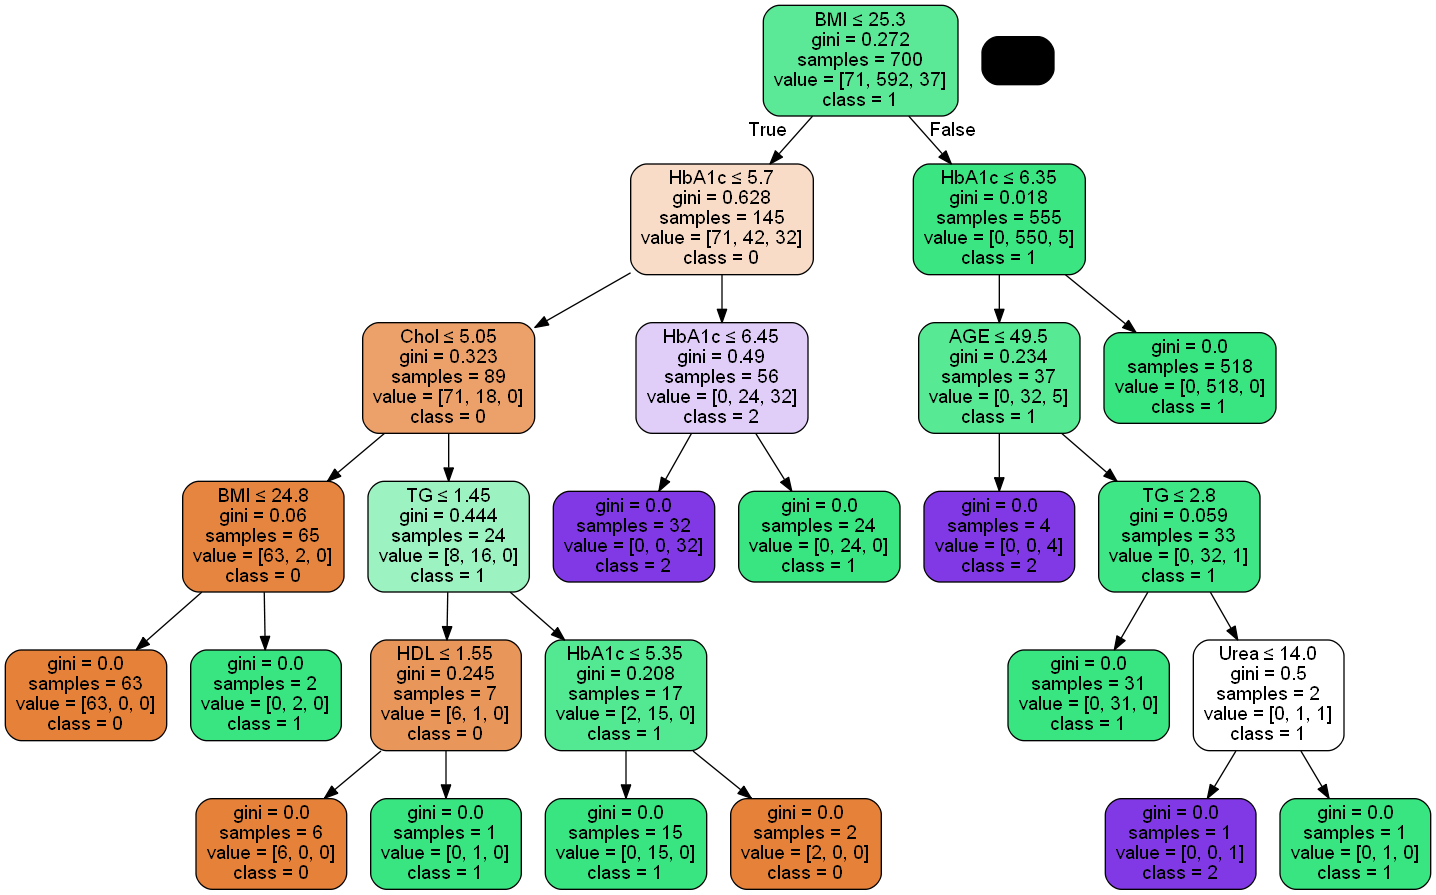

In [14]:
'''Realizamos el proceso para la gráficación del árbol de decisiones, utilizando las librerías importadas'''

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
'''Exportamos el árbol de decisiones en formato PNG. Dicha imágen se almacena en nuestro equipo'''
graph.write_png('diabetes.png')
Image(graph.create_png())



In [15]:
'''Seguidamente, podamos el árbol por lo que, creamos un nuevo objeto del tipo de arbol de decisión, 
    en el cúal le pasamos como criterio entropy'''
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [16]:
'''Entrenamos nuevamente el modelo Decision Tree con las variables de entrenamiento anteriormente definidas '''
clf = clf.fit(X_train,y_train)
'''Definimos la predeccion a (y) para la prueba de nuestro modelo. Por lo que, le pasamos la variable definida X_test
    anteriormente'''
y_pred = clf.predict(X_test)
'''Imprimimos la variable y_pred para ver los valores que contiene'''
print(y_pred)

[1 1 1 1 1 1 1 1 1 0 1 2 1 0 1 2 2 0 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 2 1 1 2 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 0 2 1 0 1 1 1 1 1 1 2 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 1 1]


In [17]:
'''Imprimimos nuevamente el Accuracy para saber la precision que tuvo nuestro modelo'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


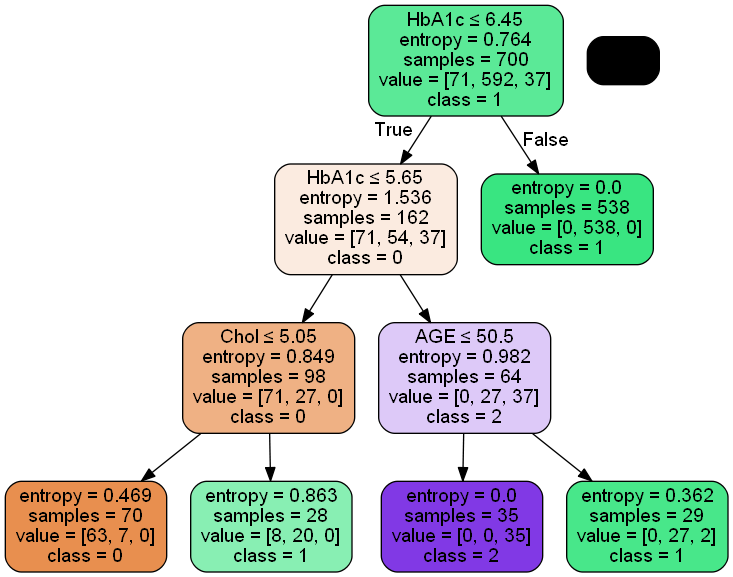

In [18]:
'''Realizamos el proceso para la gráficación del árbol de decisiones, utilizando las librerías importadas'''

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
'''Exportamos el árbol de decisiones en formato PNG. Dicha imágen se almacena en nuestro equipo'''
graph.write_png('diabetes2Podado.png')
Image(graph.create_png())